# Day 4 Lab, IS 4487

## Outline

 - Identify the target variable for an analysis based on the business problem.
 - Compute the mean of a binary variable.
 - Plot a numeric (or count) variable against a categorical variable.
 - Calculate a count (and a proportion) for a categorical variable and visualize the result into a plot.

##Load Libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Load and Clean Data


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/dd870389117d5b24eee7417d5378d80496555130/Labs/DataSets/megatelco_leave_survey.csv")


In [ ]:
#look at the top rows
df.head(10)

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,zero,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,one,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,one,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,one,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
9,one,37852,0,74,264893,857,0.0,2,low,low,yes,LEAVE,12612


In [ ]:
#look at the datatypes
df.info()

In [ ]:
#describe the data before cleaning it, clean it, then describe again
df.describe()

In [ ]:
pd.options.mode.copy_on_write = True

df_clean = df.query('house > 0 & income > 0 & handset_price < 1000')

df_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4994.000000,4997.000000,4997.000000
mean,79918.829498,85.116270,24.247549,494019.823294,387.558935,7.739287,5.957174,10034.365619
std,41673.392025,85.638266,26.848091,253648.357473,213.614256,8.802897,4.388938,5814.189195
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41593.000000,0.000000,0.000000,260729.000000,219.000000,1.000000,2.000000,4949.000000
50%,75026.000000,59.000000,15.000000,452277.000000,322.000000,4.000000,5.000000,10125.000000
75%,115464.000000,177.000000,42.000000,701614.000000,528.000000,14.000000,9.000000,15084.000000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


## Calculate distribution of the outcome  

What is the proportion of people who churned?

In [ ]:
df_clean["leave"].value_counts()

leave
STAY     2526
LEAVE    2471
Name: count, dtype: int64

In [ ]:
df_clean["leave"].value_counts(normalize = True)

leave
STAY     0.505503
LEAVE    0.494497
Name: proportion, dtype: float64

# Create basic charts

- Bar chart
- Histogram
- Box plot
- Scatter plot

<Axes: xlabel='leave'>

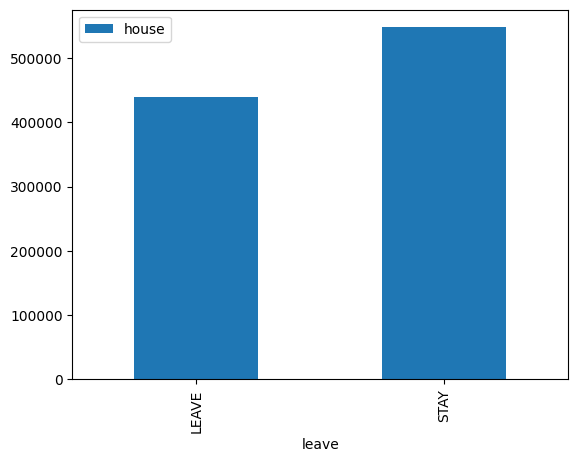

In [ ]:
#Bar chart
df_clean[['house','leave']].groupby('leave').mean('house').plot.bar()


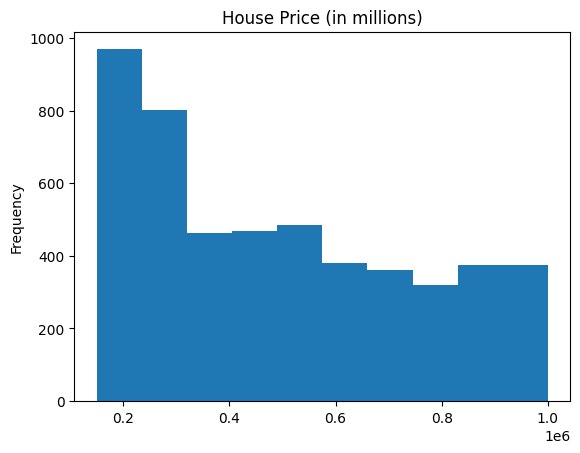

In [ ]:
#Histogram
hist = df_clean['house'].plot.hist(bins=10,title='House Price (in millions)')


In [ ]:
#Boxplot
df_clean[['leave','house']].boxplot(by='leave')

# Explore Relationships

###How does College affect leaving?

In [ ]:
#Bar chart with counts
df_clean[['college','leave']].groupby('leave').count().plot.bar()

In [ ]:
#Bar chart with percentage
college_summary = df_clean[['college','leave']].groupby('leave').count()

college_summary['college'] = (college_summary['college'] / college_summary['college'].sum()) * 100
#college_summary.head()
college_summary.plot.bar()

### How does phone price affect leaving?

In [ ]:
#Bar chart with mean price
handset_price_summary = df_clean[['handset_price','leave']].groupby('leave').mean(['handset_price'])
#handset_price_summary.head()

handset_price_summary.plot.bar()

### How about considering leaving?

In [ ]:
#Bar chart with percentage
plan = df_clean[['considering_change_of_plan','leave']].groupby('leave').count()

plan['considering_change_of_plan'] = (plan['considering_change_of_plan'] / plan['considering_change_of_plan'].sum()) * 100

plan.plot.bar()

## Create a Pair Plot
➡️ Assignment Tasks
- Import seaborn
- Create a Seaborn "pairplot" using all variables, with the color determine by "leave"
- Display the plot

In [ ]:
#pair plot

In [ ]:
## Additional Cleanup

➡️ Assignment Tasks
- Remove any records with null values from the dataframe

## Summarize Data

➡️ Assignment Tasks
- Create a second set of charts that include the outlier values (house, income, price).   How do the outliers affect the values in the charts?

In [ ]:
#house price

In [ ]:
#income

In [ ]:
#price